<a href="https://colab.research.google.com/github/Lelytameyda29rpl/PCVK_Ganjil_2025/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**D. PRAKTIKUM**

# Langkah 1 - Import Folder yang Ada di Drive

In [1]:
# Import library 'drive' dari modul 'google.colab'
# Library ini digunakan untuk mengakses Google Drive dari Google Colab
from google.colab import drive

# Mount Google Drive ke dalam environment Colab
# '/content/drive' adalah lokasi di Colab di mana Google Drive akan dihubungkan
# Setelah mount, bisa mengakses file di Google Drive seolah-olah berada di folder lokal
drive.mount('/content/drive')

Mounted at /content/drive


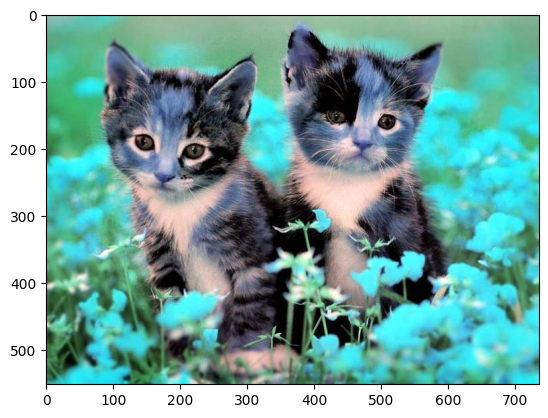

In [4]:
# Import library OpenCV, digunakan untuk memproses citra
# cv2 adalah library populer untuk pengolahan gambar/video
import cv2 as cv

# Import fungsi cv2_imshow khusus Colab untuk menampilkan gambar dengan OpenCV
# Ini digunakan karena cv.imshow() tidak berjalan di Google Colab
from google.colab.patches import cv2_imshow

# Import modul io dari skimage untuk membaca citra dari URL atau file
# skimage.io bisa digunakan sebagai alternatif cv.imread
from skimage import io

# Import matplotlib untuk menampilkan citra
# plt.imshow digunakan untuk menampilkan citra di notebook
import matplotlib.pyplot as plt

# Import numpy, library untuk manipulasi array (citra juga dianggap sebagai array 2D/3D)
import numpy as np

# Membaca citra dari Google Drive menggunakan OpenCV
# Path sesuai dengan lokasi file di Google Drive setelah mount
# cv.imread membaca citra sebagai array NumPy dengan format BGR (Blue, Green, Red)
img = cv.imread('/content/drive/MyDrive/images/kitten.jpg')

# Menampilkan citra menggunakan matplotlib
# OpenCV membaca citra dalam format BGR, sedangkan matplotlib mengira formatnya RGB
# Akibatnya warna bisa tampak tidak sesuai (misal biru dan merah tertukar)
plt.imshow(img)  # Hasilnya citra dengan channel warna BGR


# Langkah 2 - OpenCV membaca image dan menyimpan dalam channel warna BGR (Blue Green Red) Tampilkan nilai pixel dan image

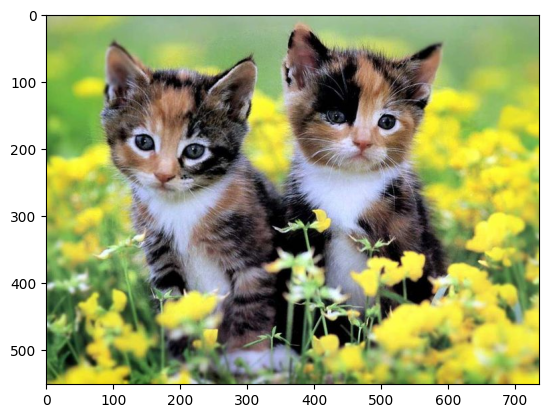

In [5]:
# Membuat variabel baru 'img2' yang merujuk ke array citra yang sama dengan 'img'
img2 = img

# Mengonversi citra dari format BGR (OpenCV default) menjadi RGB
# OpenCV menggunakan BGR, tapi matplotlib mengharapkan RGB
# Sehingga warna akan tampil dengan benar di matplotlib
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Menampilkan citra yang sudah dikonversi ke RGB menggunakan matplotlib
# Sekarang warna citra akan tampil natural, bukan terbalik antara merah dan biru
plt.imshow(img3)
plt.show()